# PROJECT : APES

In [1]:
%matplotlib inline
import numpy as np
np.random.seed(11)
from APES import *
from time import time
import skvideo.io
np.random.seed(1337)

In [2]:
Start = time()
#Add Pictures
Settings.SetBlockSize(100)
Settings.AddImage('Wall','APES/Pics/wall.jpg')
Settings.AddImage('Food','APES/Pics/food.jpg')
#Specify World Size
Settings.WorldSize=(11,11)

#Create Probabilities
obs = np.zeros(Settings.WorldSize)
ragnt = np.zeros(Settings.WorldSize)
gagnt = np.zeros(Settings.WorldSize)
food = np.zeros(Settings.WorldSize)
obs[3:8,5] = 1
ragnt[:,0] =1
gagnt[:,10]=1
food[:,4:7]=1
food[3:8,5] = 0

#Add Probabilities to Settings
Settings.AddProbabilityDistribution('Obs',obs)
Settings.AddProbabilityDistribution('ragnt',ragnt)
Settings.AddProbabilityDistribution('gagnt',gagnt)
Settings.AddProbabilityDistribution('food',food)

#Create World Elements
obs = Obstacles('Wall',Shape=np.array([[1],[1],[1],[1]]),PdstName='Obs',See=False)
ragnt = Agent(Fname='APES/Pics/ragent.jpg',Power=3,VisionAngle=360,Range=-1,PdstName='ragnt')
gagnt = Agent(Fname='APES/Pics/gagent.jpg',VisionAngle=360,Range=-1,ControlRange=0,PdstName='gagnt')
food = Foods('Food',PdstName='food')

game = World(AES=5)
#Adding Agents in Order of Following the action
game.AddAgents([ragnt,gagnt])
game.AddObstacles([obs])
game.AddFoods([food])#,Foods('Food',PdstName='food')])
Start = time()-Start
print(Start)

/home/aqeel/miniconda3/envs/Kgpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0.2982800006866455


0.0024988651275634766


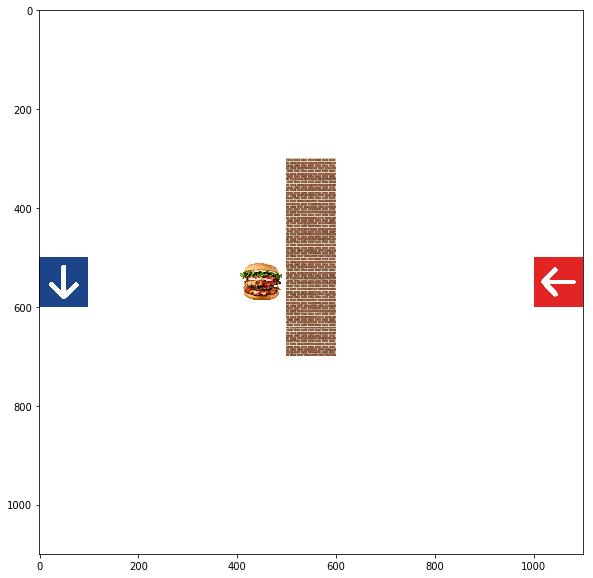

In [13]:
Start = time()
game.GenerateWorld()
Start = time()-Start
print(Start)
plt.figure(figsize=Settings.FigureSize)
plt.imshow(game.BuildImage())
#print game.world

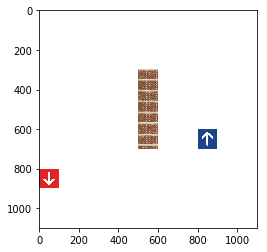

In [4]:
tt = []
writer = skvideo.io.FFmpegWriter("outputvideo.webm")
for i in range (120):
    Start = time()
    game.Step()
    gagnt.DetectAndAstar()
    ragnt.DetectAndAstar()
    tt.append(time()-Start)
    
    #t = np.array(,dtype=np.uint8)
    writer.writeFrame(game.BuildImage()*255)
plt.imshow(game.BuildImage())
writer.close()

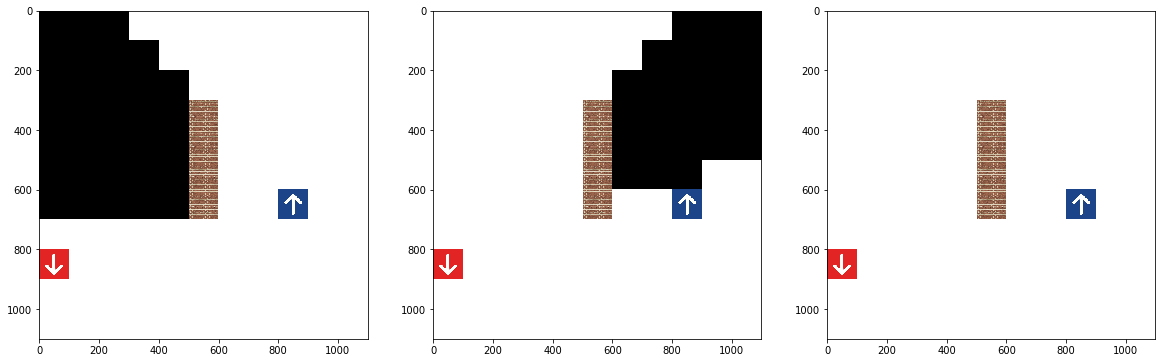

In [12]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(game.AgentViewPoint(1001))
plt.subplot(1,3,2)
plt.imshow(game.AgentViewPoint(1002))
plt.subplot(1,3,3)
plt.imshow(game.BuildImage())